<a href="https://colab.research.google.com/github/NancyBudgujjar/Liver-Disease-Prediction/blob/main/Liver_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/uciml/indian-liver-patient-records

Prediction of Liver Disease using Random Forest classifierand balancing imbalanced data.
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India.
The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease).
This data set contains 441 male patient records and 142 female patient records.Any patient whose age exceeded 89 is listed as being of age "90".





In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/indian_liver_patient.csv')
df.shape

(583, 11)

In [4]:
df['Dataset'].value_counts()  # 1 = Liver disease and 2 is no disease

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
categories = {1: 1, 2: 0}   #Now we map 1 = 1(Liver disease), 2 = 0(no disease)
df['Dataset'] = df['Dataset'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.describe().T  #Values need to be normalized before fitting.

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,0.713551,0.452490,0.0,0.0,1.00,1.0,1.0


In [9]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [10]:
print(df['Albumin_and_Globulin_Ratio'].mean())

0.9470639032815197


In [11]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [12]:
df.duplicated().sum()

13

Since there is no unique patient identifier against each observation, and since it is highly improbable that two subjects have the same exact feature values, its safe to say that these records are possibly duplicates. I will remove these.

In [13]:
df[df.duplicated]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,0
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [14]:
df = df.drop_duplicates().reset_index().drop('index', axis = 1)

In [15]:
df.shape

(570, 11)

In [16]:
df = df.rename(columns={'Dataset':'Label'}) #Rename Dataset to Label to make it easy to understand
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

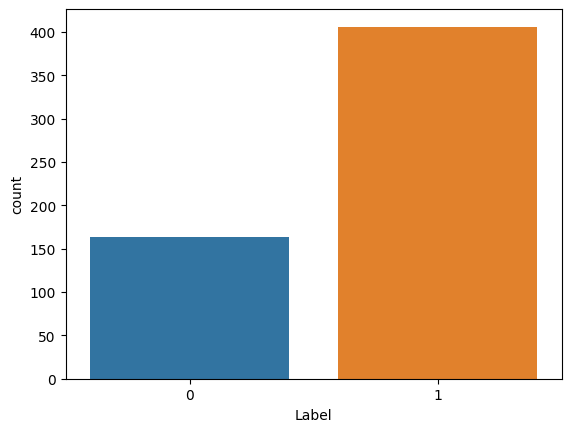

In [17]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

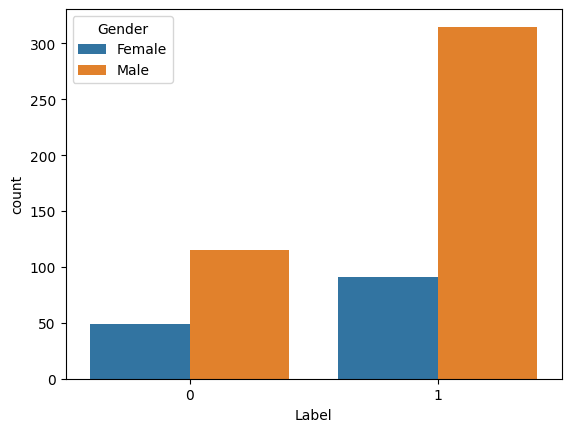

In [18]:
sns.countplot(x="Label", hue="Gender", data=df)

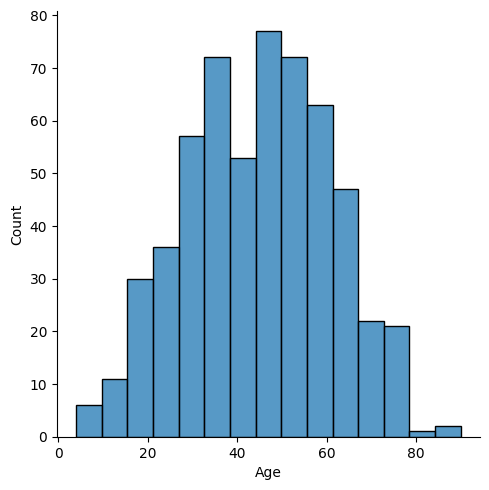

In [19]:
sns.displot(df['Age'], kde=False)

<Axes: xlabel='Age', ylabel='count'>

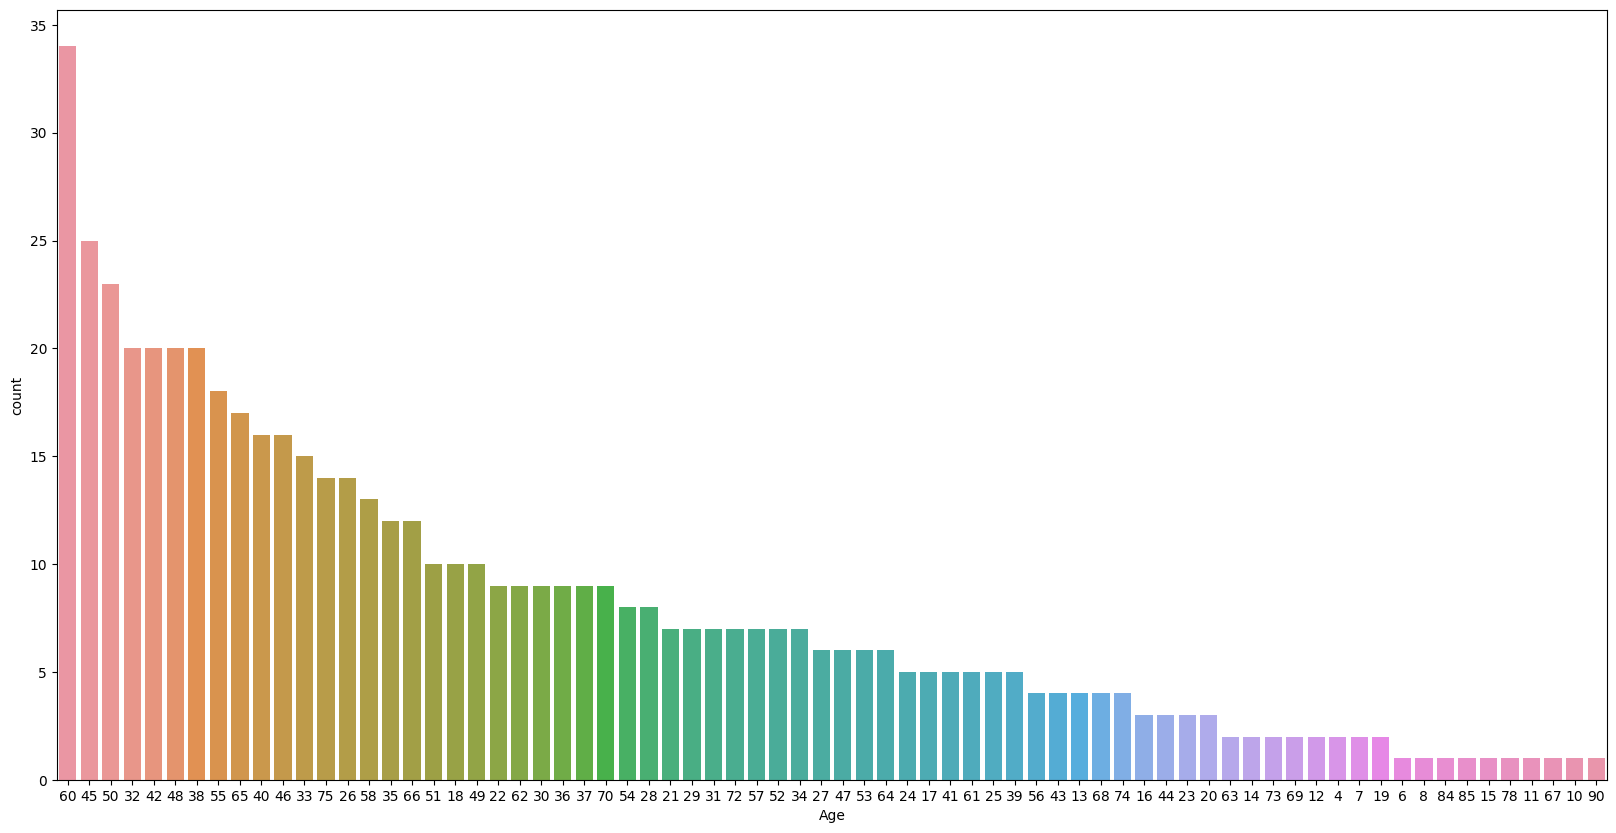

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='Albumin'>

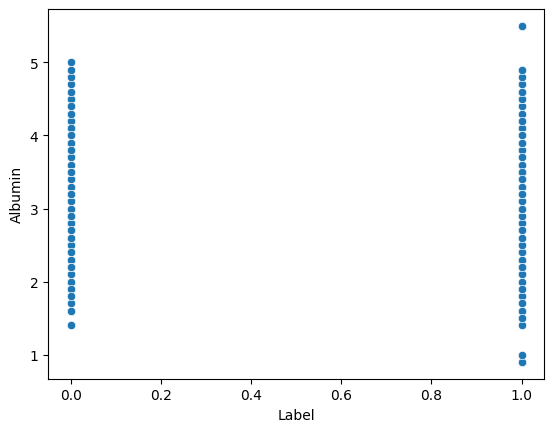

In [21]:
sns.scatterplot(x="Label", y="Albumin", data=df)  #Seems no trend between labels 0 and 1

<Axes: xlabel='Label', ylabel='Albumin_and_Globulin_Ratio'>

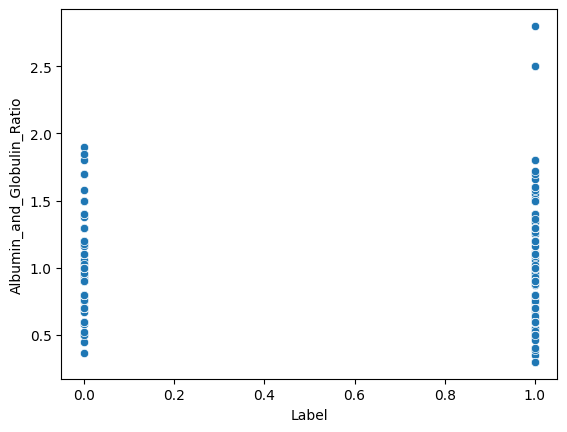

In [22]:
sns.scatterplot(x="Label", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 0 and 1

<Axes: xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

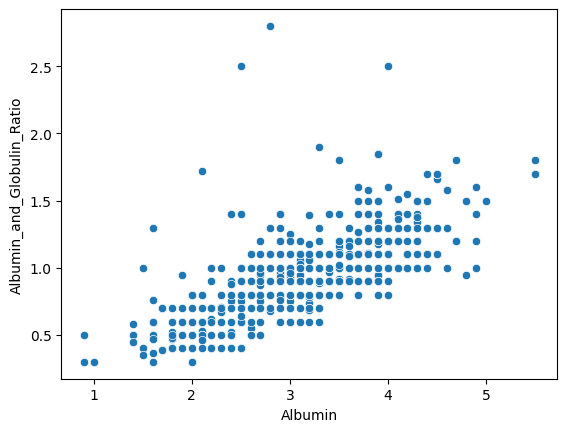

In [23]:
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 0 and 1

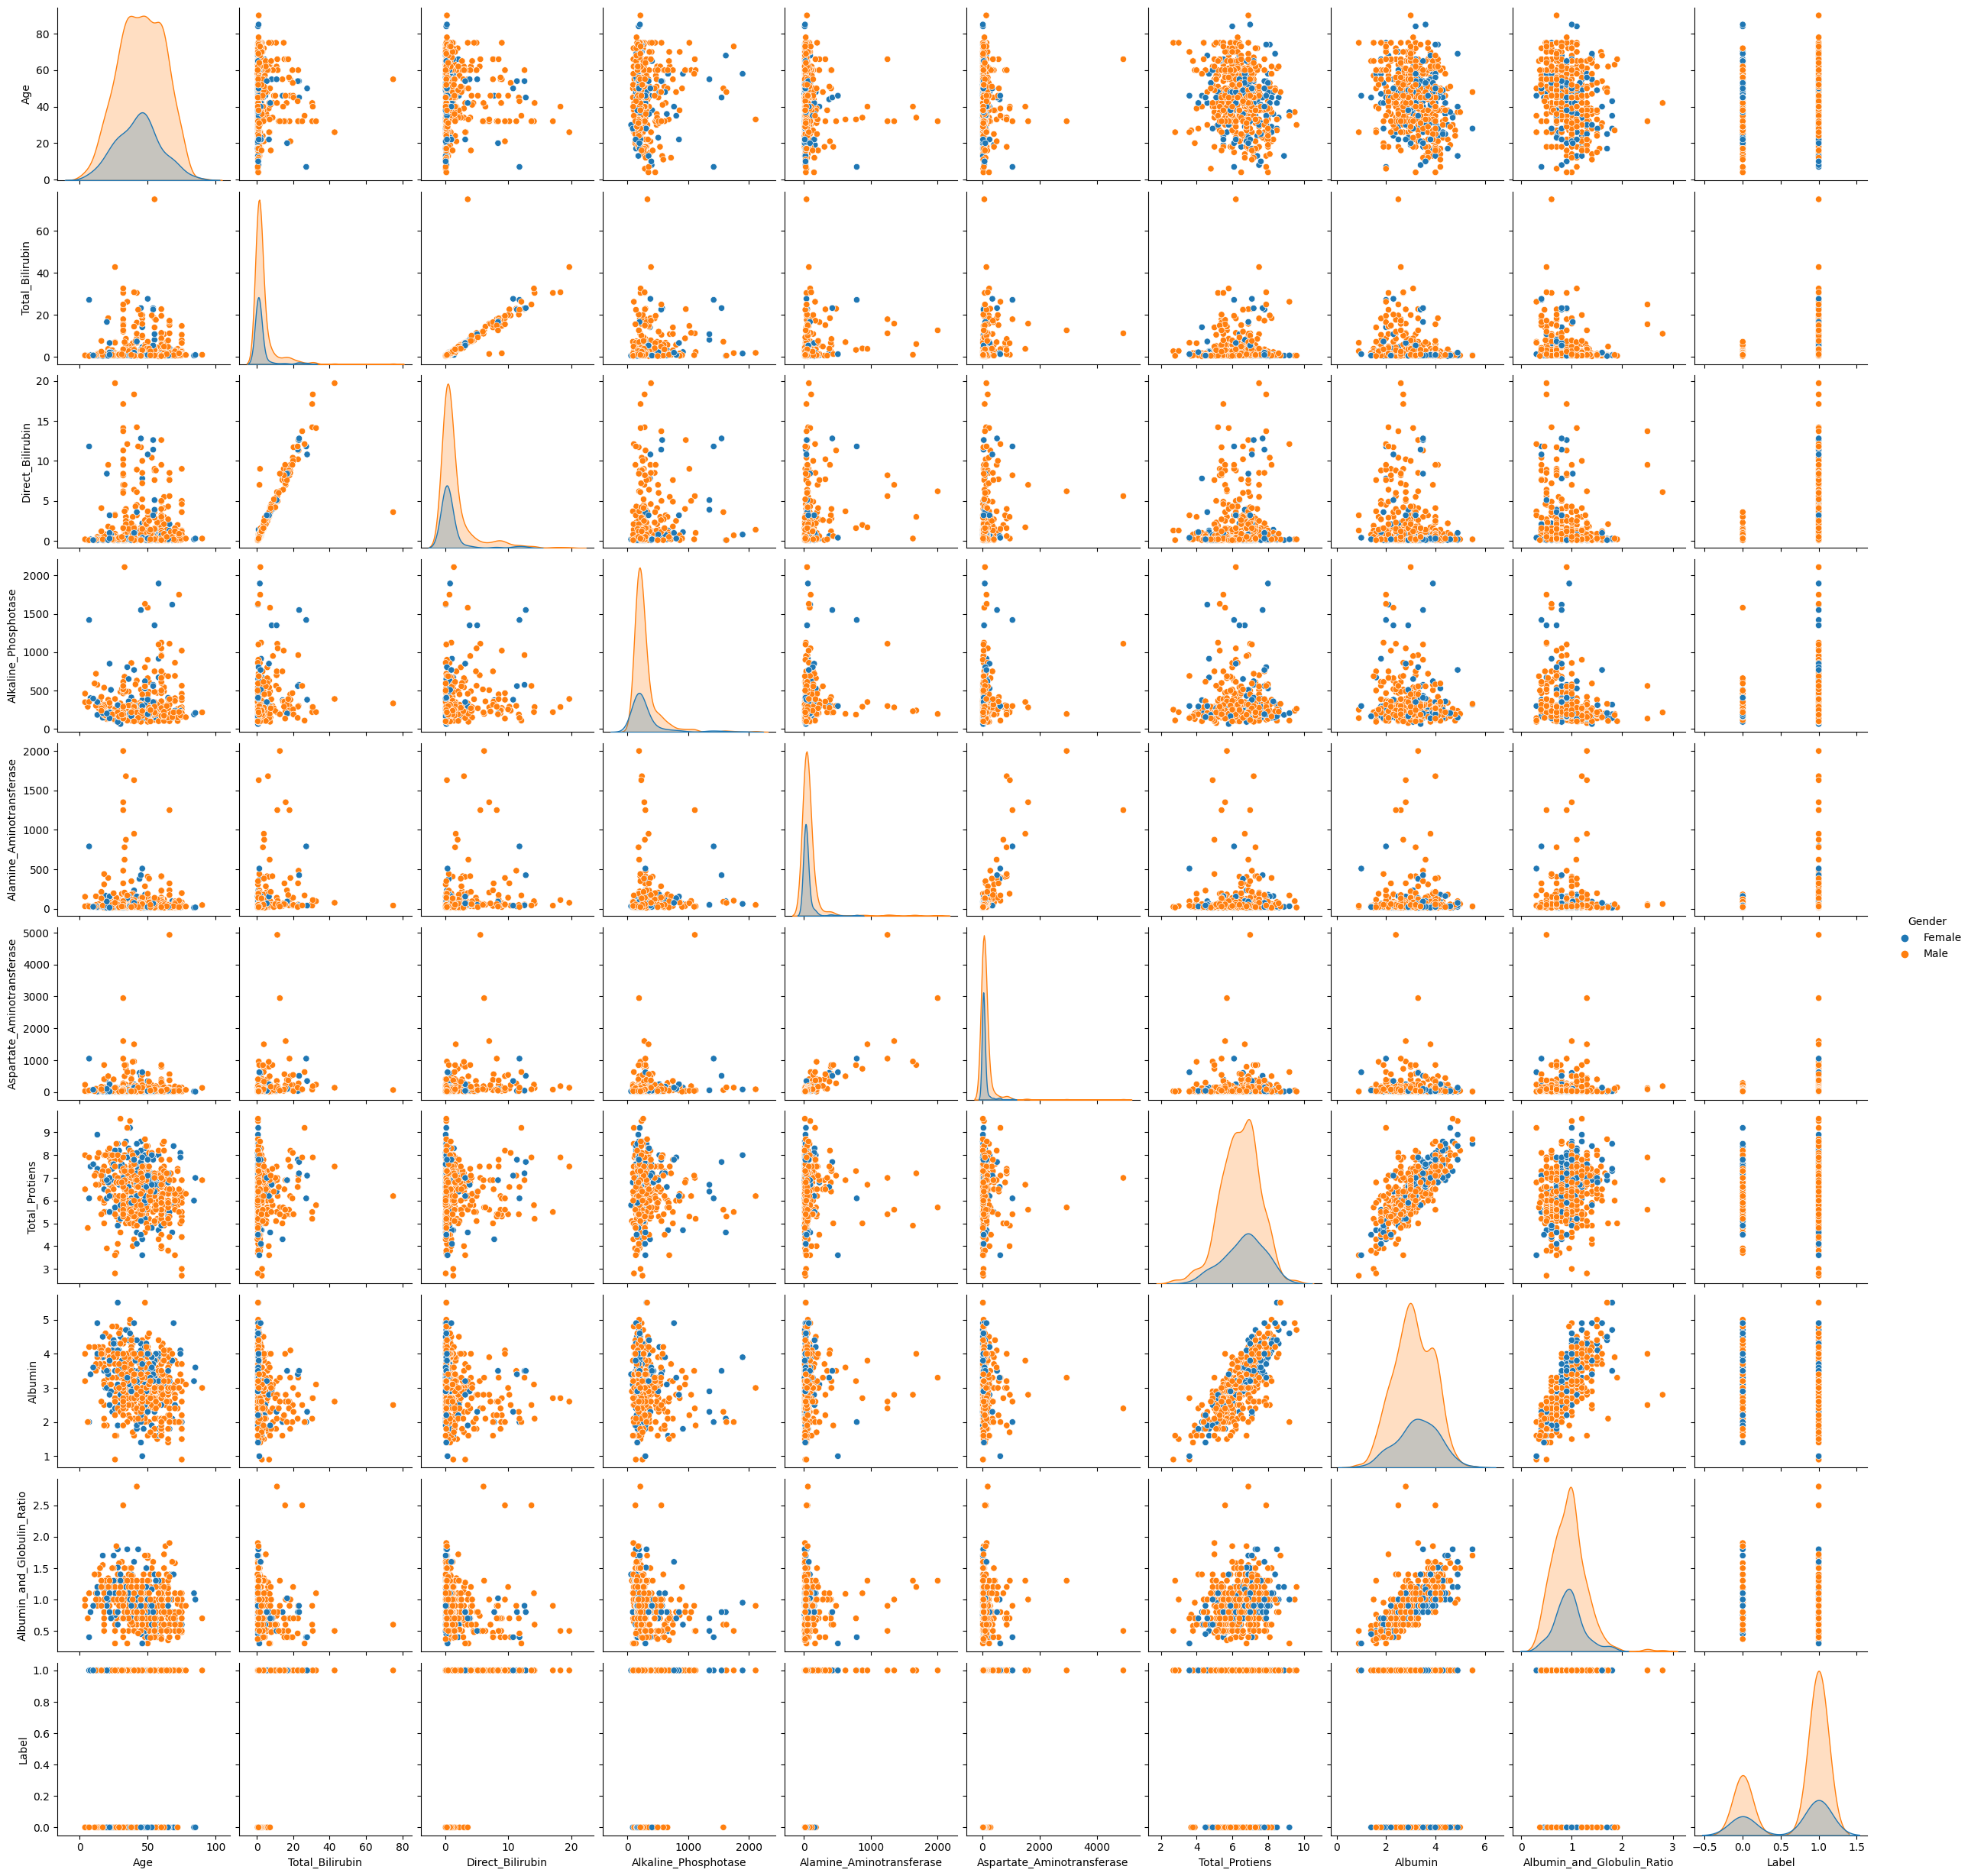

In [42]:
sns.pairplot(df, hue='Gender')

<ipython-input-24-f92d98c36930>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

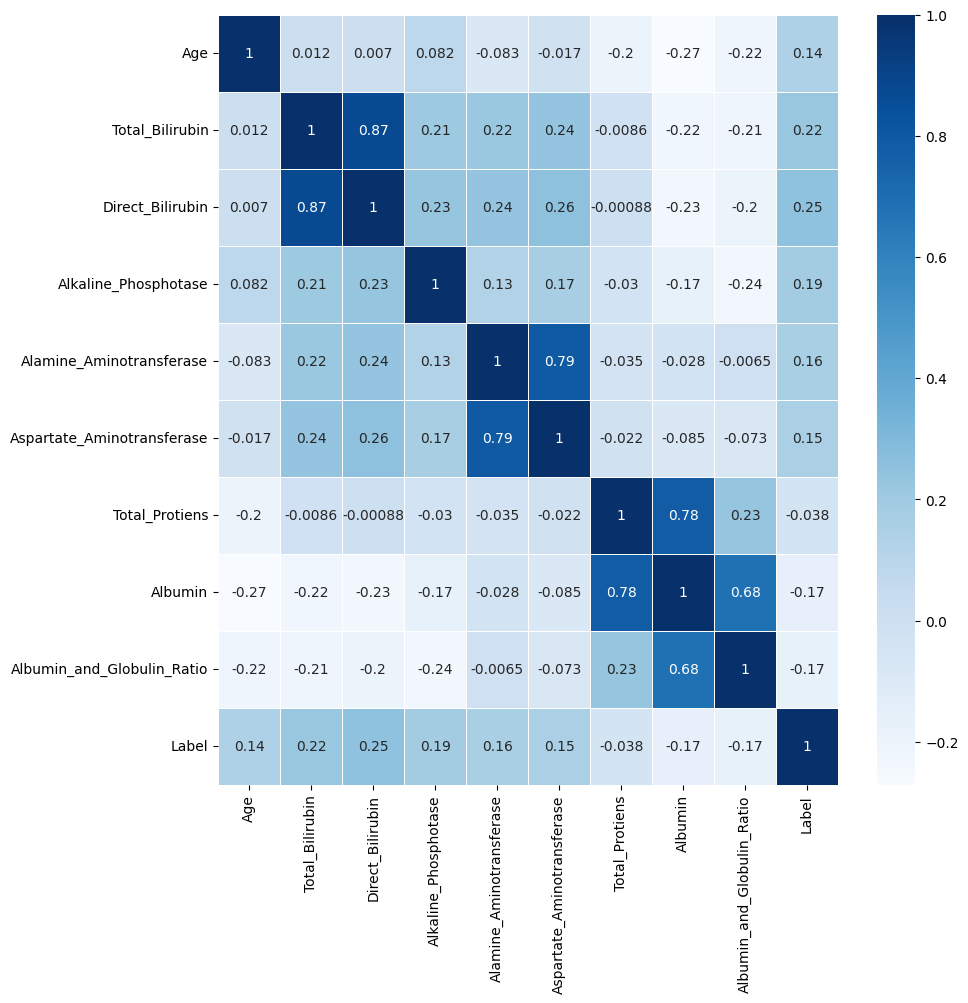

In [24]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True) #May be Gender and total protien not big factors influencing the label

In [25]:
df['Gender'].value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

In [26]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Gender'] = df['Gender'].replace(categories)

Y = df["Label"].values
X = df.drop(labels = ["Label"], axis=1)

In [27]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(456, 10)
(456,)


In [28]:
from keras.utils import normalize
X = normalize(X, axis=1)

# Technique 1: Appropriate Model Selection

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

models= [
         ('Logestic Regression',LogisticRegression(max_iter=900)),
         ('SVM',SVC(kernel='linear')),
         ('Random Forest Classifier',RandomForestClassifier()),
         ('KNeighbors Classifier',KNeighborsClassifier()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('AdaBoost Classifier',AdaBoostClassifier()),
         ('XGB Classifier',XGBClassifier()),
         ('GaussianNB',GaussianNB ())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                  ModelName  Train_Acc  Test_Acc
0       Logestic Regression   0.723684  0.710526
1                       SVM   0.703947  0.736842
2  Random Forest Classifier   1.000000  0.745614
3     KNeighbors Classifier   0.807018  0.649123
4             Decision Tree   1.000000  0.552632
5       AdaBoost Classifier   0.817982  0.719298
6            XGB Classifier   1.000000  0.728070
7                GaussianNB   0.578947  0.517544


Logistic regression :- Can be very slow.

SVM :- can also be extremely slow.

Random Forest :- ideal for imbalanced datasets.

#Logistic Regression

In [30]:
logreg = LogisticRegression(max_iter=900)
logreg.fit(X_train, y_train) # fit the model on the training data
y_pred = logreg.predict(X_test) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test, y_pred) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7105263157894737


#Support Vector Machine (SVM)

In [31]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train) # Train the SVM model on the training data
y_pred = svm_model.predict(X_test) # Make predictions on the test data

accuracy = metrics.accuracy_score(y_test, y_pred) # Calculate the accuracy of the SVM model
print("Accuracy:", accuracy)

Accuracy: 0.7368421052631579


#Random Forest

In [32]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Alkaline_Phosphotase          0.144368
Alamine_Aminotransferase      0.137858
Aspartate_Aminotransferase    0.122775
Total_Bilirubin               0.120847
Age                           0.115994
Albumin                       0.104555
Total_Protiens                0.088695
Albumin_and_Globulin_Ratio    0.087743
Direct_Bilirubin              0.065706
Gender                        0.011458
dtype: float64


In [33]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data.

print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("  Accuracy =", metrics.accuracy_score(y_test, prediction_test_RF))

METRICS FOR IMBALANCED DATA: 
  Accuracy = 0.7631578947368421


In [34]:
(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print("Count of predicted label:" ,unique, counts)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print("Confusion Metrics: \n", cm)

Count of predicted label: [0 1] [20 94]
Confusion Metrics: 
 [[11 18]
 [ 9 76]]


means 11 out of 20 labled are correctly as 0(healthy patient) and 9/20 are mislablled as 1, i.e., 9 are healthy patients but still labelled as 1.

76 our of 94 are correctly labled and 18 are mislablled.

In [35]:
#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))

Precision Values for: 
  Healthy Patients with no disease = 0.55
  Patients With Liver disease = 0.8085106382978723

Recall Values for: 
  Healthy Patients with no disease =  0.3793103448275862
  Healthy Patients With Liver disease =  0.8941176470588236

F-Measure Values for: 
  Healthy Patients with no disease =  0.4489795918367347
  Patients with liver disease =  0.8491620111731844


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [36]:
from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

print("ROC_AUC score for imbalanced data is: ", roc_auc_score(y_test, prediction_test_RF))

ROC_AUC score for imbalanced data is:  0.6367139959432049


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


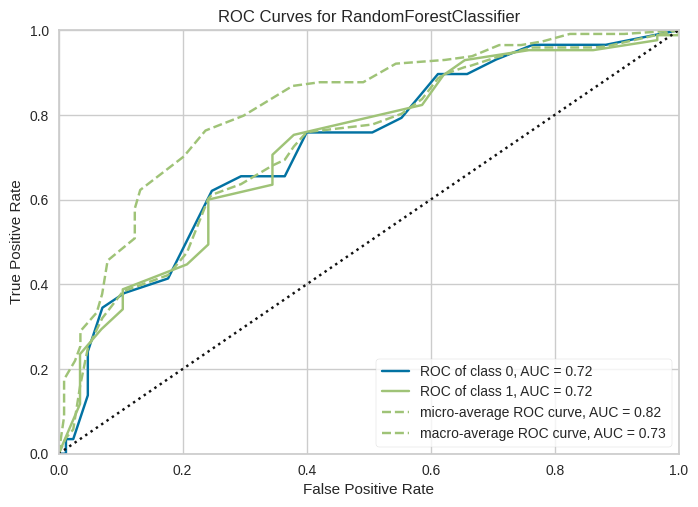

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

# Handling Imbalanced data

Technique 1: Generate synthetic data (SMOTE and ADASYN)
SMOTE: Synthetic Minority Oversampling Technique

ADASYN: Adaptive Synthetic

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

pip install imblearn

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [38]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1] [164 406]
After SMOTE:  [0 1] [406 406]


#Logestic Regression after SMOTE


In [39]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)

Accuracy: 0.6134969325153374


Count of predicted label: [0 1] [110  53]

Confusion Metrics: 
 [[69 22]
 [41 31]]

Precision Values for: 
  Healthy Patients with no disease = 0.6272727272727273
  Patients With Liver disease = 0.5849056603773585

Recall Values for: 
  Healthy Patients with no disease =  0.7582417582417582
  Healthy Patients With Liver disease =  0.4305555555555556

F-Measure Values for: 
  Healthy Patients with no disease =  0.6865671641791045
  Patients with liver disease =  0.49600000000000005

ROC AUC score for Logestic Regression model after SMOTE:  0.5943986568986569



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


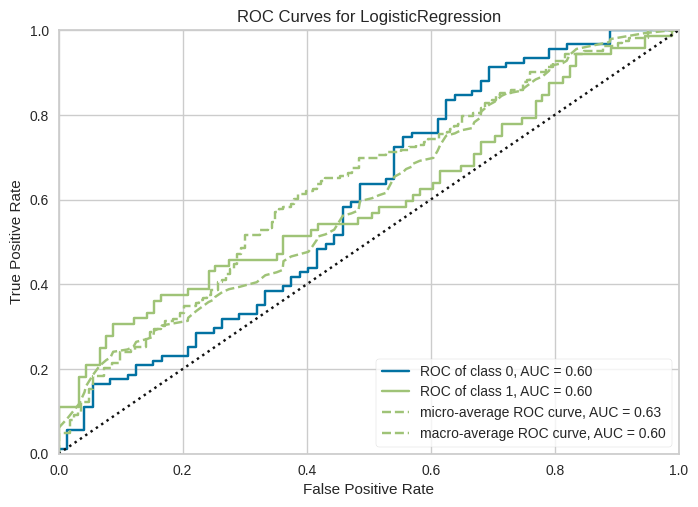

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [40]:
(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logestic Regression model after SMOTE: ",roc_auc_score(y_test_smote, LR_prediction_smote))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#SVM

In [42]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_smote, y_train_smote)
SVM_prediction_smote = model_SVM.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, SVM_prediction_smote)
print("Accuracy:", accuracy)

Accuracy: 0.6257668711656442


In [43]:
(unique, counts) = np.unique(SVM_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, SVM_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for SVM model after SMOTE: ",roc_auc_score(y_test_smote, SVM_prediction_smote))

Count of predicted label: [0 1] [138  25]

Confusion Metrics: 
 [[84  7]
 [54 18]]

Precision Values for: 
  Healthy Patients with no disease = 0.6086956521739131
  Patients With Liver disease = 0.72

Recall Values for: 
  Healthy Patients with no disease =  0.9230769230769231
  Healthy Patients With Liver disease =  0.25

F-Measure Values for: 
  Healthy Patients with no disease =  0.7336244541484717
  Patients with liver disease =  0.3711340206185567

ROC AUC score for SVM model after SMOTE:  0.5865384615384616


#Random Forest

In [46]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))

Accuracy =  0.7791411042944786


Count of predicted labels:  [0 1] [97 66]

Confusion Metrics after SMOTE: 
 [[76 15]
 [21 51]]

Precision Values for: 
  Healthy Patients with no disease = 0.7835051546391752
  Patients With Liver disease = 0.7727272727272727

Recall Values for: 
  Healthy Patients with no disease =  0.8351648351648352
  Healthy Patients With Liver disease =  0.7083333333333334

F-Measure Values for: 
  Healthy Patients with no disease =  0.8085106382978723
  Patients with liver disease =  0.7391304347826088

ROC AUC score for Random Forest model after SMOTE:  0.7717490842490844



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


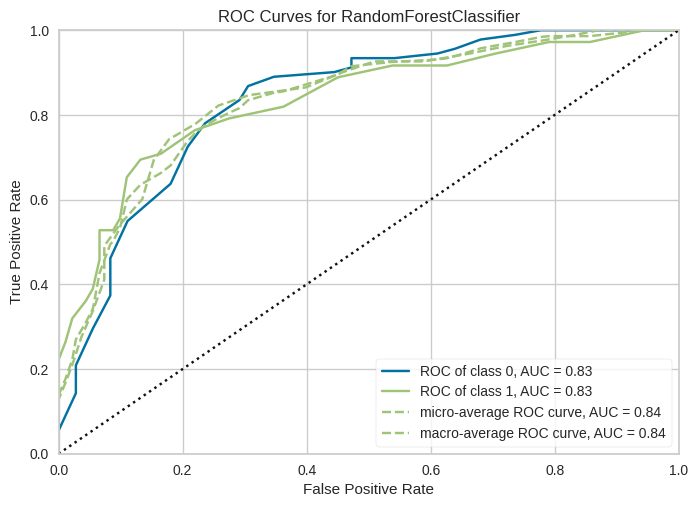

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [49]:
(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTE: ",roc_auc_score(y_test_smote, RF_prediction_smote))
print()

roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#Handling Imbalanced Data using SMOTEENN
It combines SMOTE and Edited Nearest Neighbours(ENN)

In [50]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

'''
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)
'''

'\nfrom imblearn.combine import SMOTETomek\nsmote_tomek = SMOTETomek(random_state=0)\nX_resampled, y_resampled = smote_tomek.fit_resample(X, Y)\n'

In [51]:
(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

Original data:  [0 1] [164 406]
After SMOTEENN:  [0 1] [216 153]


In [52]:
X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Logistic Regression

In [53]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteenn, y_train_smoteenn)
LR_prediction_smoteenn = model_LR.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, LR_prediction_smoteenn)
print("Accuracy of Logistic Regression after SMOTEENN:", accuracy)

Accuracy of Logistic Regression after SMOTEENN: 0.7972972972972973


Count of predicted label: [0 1] [56 18]

Confusion Metrics: 
 [[43  2]
 [13 16]]

Precision Values for: 
  Healthy Patients with no disease = 0.7678571428571429
  Patients With Liver disease = 0.8888888888888888

Recall Values for: 
  Healthy Patients with no disease =  0.9555555555555556
  Healthy Patients With Liver disease =  0.5517241379310345

F-Measure Values for: 
  Healthy Patients with no disease =  0.8514851485148515
  Patients with liver disease =  0.6808510638297872

ROC AUC score for Logistic Regression model after SMOTEENN:  0.7536398467432951



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


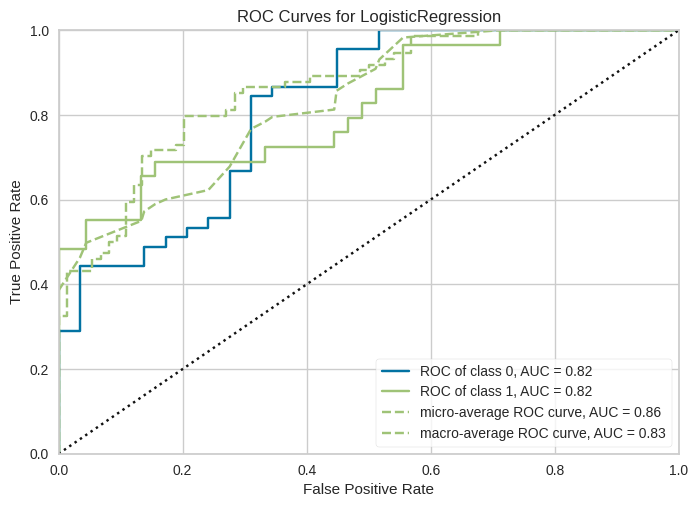

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
(unique, counts) = np.unique(LR_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after SMOTEENN: ", roc_auc_score(y_test_smoteenn, LR_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

#SVM

In [55]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_smoteenn, y_train_smoteenn)
SVM_prediction_smoteenn = model_SVM.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, SVM_prediction_smoteenn)
print("Accuracy of SVM after SMOTEENN:", accuracy)

Accuracy of SVM after SMOTEENN: 0.7837837837837838


In [56]:
(unique, counts) = np.unique(SVM_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, SVM_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for SVM model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, SVM_prediction_smoteenn))

Count of predicted label: [0 1] [59 15]

Confusion Metrics: 
 [[44  1]
 [15 14]]

Precision Values for: 
  Healthy Patients with no disease = 0.7457627118644068
  Patients With Liver disease = 0.9333333333333333

Recall Values for: 
  Healthy Patients with no disease =  0.9777777777777777
  Healthy Patients With Liver disease =  0.4827586206896552

F-Measure Values for: 
  Healthy Patients with no disease =  0.8461538461538463
  Patients with liver disease =  0.6363636363636364

ROC AUC score for Logestic Regression model after SMOTEENN:  0.7302681992337166


#Random Forest

In [63]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteenn, y_train_smoteenn)

RF_prediction_smoteenn = model_RF.predict(X_test_smoteenn)
print ("Accuracy of Random Forest after SMOTEENN = ", metrics.accuracy_score(y_test_smoteenn, RF_prediction_smoteenn))

Accuracy of Random Forest after SMOTEENN =  0.8783783783783784


Count of predicted labels:  [0 1] [42 32]

Confusion Metrics after SMOTE: 
 [[39  6]
 [ 3 26]]

Precision Values for: 
  Healthy Patients with no disease = 0.9285714285714286
  Patients With Liver disease = 0.8125

Recall Values for: 
  Healthy Patients with no disease =  0.8666666666666667
  Healthy Patients With Liver disease =  0.896551724137931

F-Measure Values for: 
  Healthy Patients with no disease =  0.896551724137931
  Patients with liver disease =  0.8524590163934426

ROC AUC score for Random Forest model after SMOTEENN:  0.8816091954022989



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


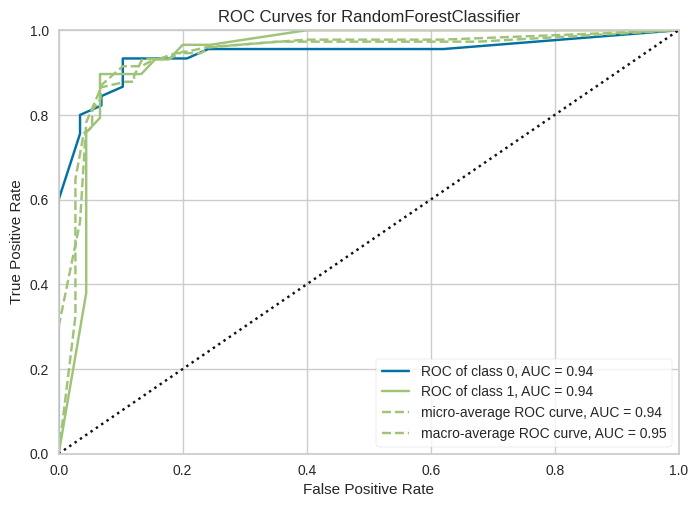

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
(unique, counts) = np.unique(RF_prediction_smoteenn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTEENN: ",roc_auc_score(y_test_smoteenn, RF_prediction_smoteenn))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_smoteenn, y_train_smoteenn)
roc_auc.score(X_test_smoteenn, y_test_smoteenn)
roc_auc.show()

#ADASYN

In [65]:
from imblearn.over_sampling import ADASYN

X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, Y_adasyn, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

Original data:  [0 1] [164 406]
After ADASYN:  [0 1] [382 406]


Logistic Regression

In [66]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_adasyn, y_train_adasyn)
LR_prediction_adasyn = model_LR.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, LR_prediction_adasyn)
print("Accuracy:", accuracy)

Accuracy: 0.569620253164557
ROC AUC score for Logestic Regression model after ADASYN:  0.5656290115532734


Count of predicted label: [0 1] [96 62]

Confusion Metrics: 
 [[55 27]
 [41 35]]

Precision Values for: 
  Healthy Patients with no disease = 0.5729166666666666
  Patients With Liver disease = 0.5645161290322581

Recall Values for: 
  Healthy Patients with no disease =  0.6707317073170732
  Healthy Patients With Liver disease =  0.4605263157894737

F-Measure Values for: 
  Healthy Patients with no disease =  0.6179775280898876
  Patients with liver disease =  0.5072463768115941

ROC AUC score for Logistic Regression model after ADASYN:  0.5656290115532734



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


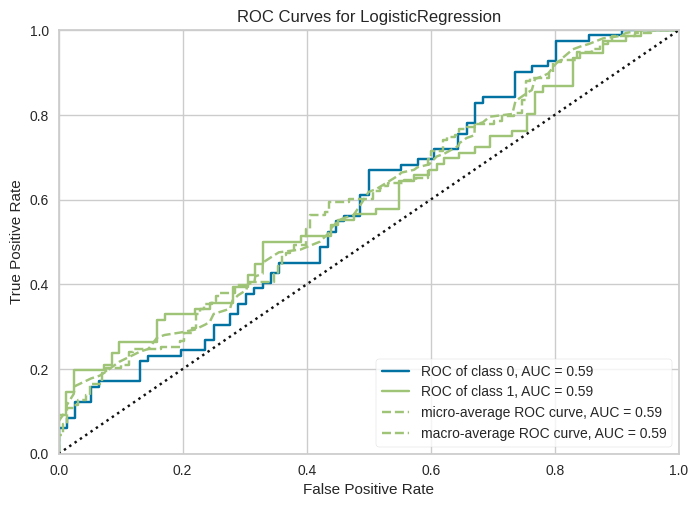

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [70]:
(unique, counts) = np.unique(LR_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, LR_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after ADASYN: ", roc_auc_score(y_test_adasyn, LR_prediction_adasyn))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

SVM

In [69]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_adasyn, y_train_adasyn)
SVM_prediction_adasyn = model_SVM.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, SVM_prediction_adasyn)
print("Accuracy:", accuracy)

Accuracy: 0.5886075949367089


In [71]:
(unique, counts) = np.unique(SVM_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, SVM_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after ADASYN: ", roc_auc_score(y_test_adasyn, SVM_prediction_adasyn))

Count of predicted label: [0 1] [125  33]

Confusion Metrics: 
 [[71 11]
 [54 22]]

Precision Values for: 
  Healthy Patients with no disease = 0.568
  Patients With Liver disease = 0.6666666666666666

Recall Values for: 
  Healthy Patients with no disease =  0.8658536585365854
  Healthy Patients With Liver disease =  0.2894736842105263

F-Measure Values for: 
  Healthy Patients with no disease =  0.6859903381642511
  Patients with liver disease =  0.40366972477064217

ROC AUC score for Logistic Regression model after ADASYN:  0.5776636713735558


Random Forest

In [74]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_adasyn, y_train_adasyn)

RF_prediction_adasyn = model_RF.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, RF_prediction_adasyn))

Accuracy =  0.7721518987341772


Count of predicted label: [0 1] [84 74]

Confusion Metrics: 
 [[65 17]
 [19 57]]

Precision Values for: 
  Healthy Patients with no disease = 0.7738095238095238
  Patients With Liver disease = 0.7702702702702703

Recall Values for: 
  Healthy Patients with no disease =  0.7926829268292683
  Healthy Patients With Liver disease =  0.75

F-Measure Values for: 
  Healthy Patients with no disease =  0.783132530120482
  Patients with liver disease =  0.7600000000000001

ROC AUC score for Random Forest model after ADASYN:  0.7713414634146342



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


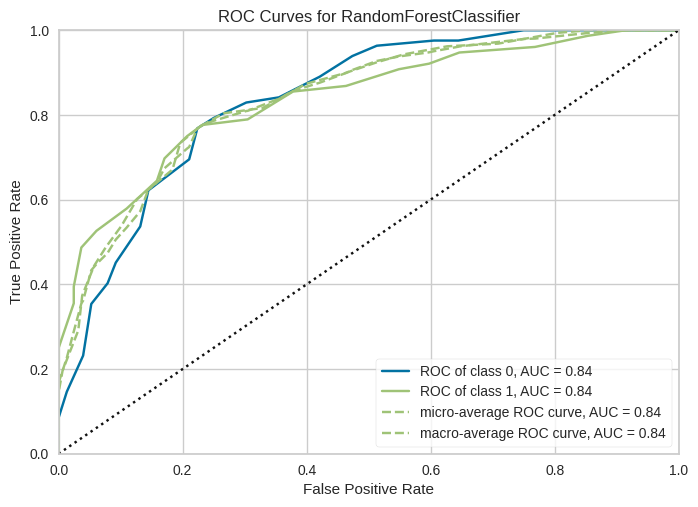

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
(unique, counts) = np.unique(RF_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, RF_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after ADASYN: ", roc_auc_score(y_test_adasyn, RF_prediction_adasyn))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

#Technique 4: Up-sample minority class

In [76]:
from sklearn.utils import resample
print(df['Label'].value_counts())

1    406
0    164
Name: Label, dtype: int64


In [77]:
df_majority = df[df['Label'] == 1]  #Separate majority and minority classes
df_minority = df[df['Label'] == 0]

# Upsample minority class and other classes separately If not, random samples from combined classes
# will be duplicated and we run into same issue as before, undersampled remians undersampled.
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=406,    # to match average class
                                 random_state=42) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # Combine majority class with upsampled minority class
print(df_upsampled['Label'].value_counts())

1    406
0    406
Name: Label, dtype: int64


In [78]:
Y_upsampled = df_upsampled["Label"].values

X_upsampled = df_upsampled.drop(labels = ["Label", "Gender"], axis=1)
X_upsampled = normalize(X_upsampled, axis=1)

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

#Train again with new upsampled data

Logistic Regression

In [80]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_upsampled, y_train_upsampled)
LR_prediction_upsampling = model_LR.predict(X_test_upsampled)

accuracy = metrics.accuracy_score(y_test_upsampled, LR_prediction_upsampling)
print("Accuracy:", accuracy)

Accuracy: 0.6073619631901841


Count of predicted label: [0 1] [114  49]

Confusion Metrics: 
 [[64 14]
 [50 35]]

Precision Values for: 
  Healthy Patients with no disease = 0.5614035087719298
  Patients With Liver disease = 0.7142857142857143

Recall Values for: 
  Healthy Patients with no disease =  0.8205128205128205
  Healthy Patients With Liver disease =  0.4117647058823529

F-Measure Values for: 
  Healthy Patients with no disease =  0.6666666666666666
  Patients with liver disease =  0.5223880597014926

ROC AUC score for Logistic Regression model after upsampling:  0.6161387631975866



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


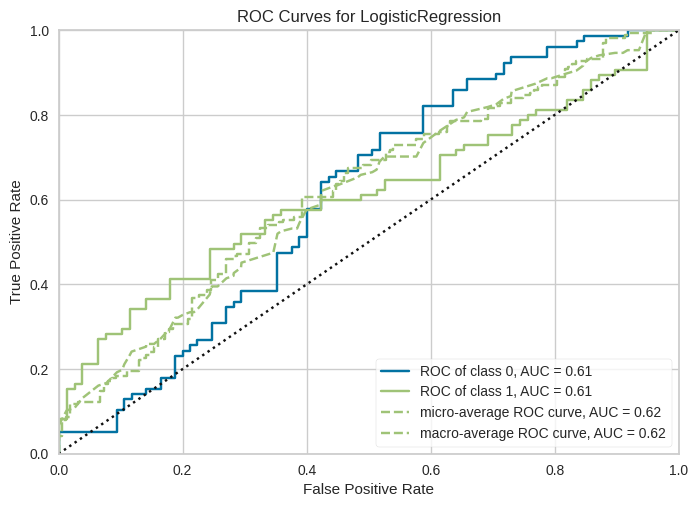

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [81]:
(unique, counts) = np.unique(LR_prediction_upsampling, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, LR_prediction_upsampling)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after upsampling: ", roc_auc_score(y_test_upsampled, LR_prediction_upsampling))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

SVM

In [90]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_upsampled, y_train_upsampled)
SVM_prediction_upsampling = model_SVM.predict(X_test_upsampled)

accuracy = metrics.accuracy_score(y_test_upsampled, SVM_prediction_upsampling) # Calculate the accuracy of the SVM model after SMOTE
print("Accuracy:", accuracy)

Accuracy: 0.5766871165644172


In [91]:
(unique, counts) = np.unique(SVM_prediction_upsampling, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, SVM_prediction_upsampling)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for SVM model after upsampling: ", roc_auc_score(y_test_upsampled, SVM_prediction_upsampling))


Count of predicted label: [0 1] [137  26]

Confusion Metrics: 
 [[73  5]
 [64 21]]

Precision Values for: 
  Healthy Patients with no disease = 0.5328467153284672
  Patients With Liver disease = 0.8076923076923077

Recall Values for: 
  Healthy Patients with no disease =  0.9358974358974359
  Healthy Patients With Liver disease =  0.24705882352941178

F-Measure Values for: 
  Healthy Patients with no disease =  0.6790697674418605
  Patients with liver disease =  0.3783783783783784

ROC AUC score for SVM model after upsampling:  0.5914781297134238


RANDOM FOREST

In [87]:
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
RF_prediction_upsampled = model_RF_upsampled.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, RF_prediction_upsampled))

Accuracy =  0.8282208588957055


Count of predicted label: [0 1] [96 67]

Confusion Metrics: 
 [[73  5]
 [23 62]]

Precision Values for: 
  Healthy Patients with no disease = 0.7604166666666666
  Patients With Liver disease = 0.9253731343283582

Recall Values for: 
  Healthy Patients with no disease =  0.9358974358974359
  Healthy Patients With Liver disease =  0.7294117647058823

F-Measure Values for: 
  Healthy Patients with no disease =  0.8390804597701149
  Patients with liver disease =  0.8157894736842104

ROC AUC score for Logistic Regression model after upsampling:  0.8326546003016592



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


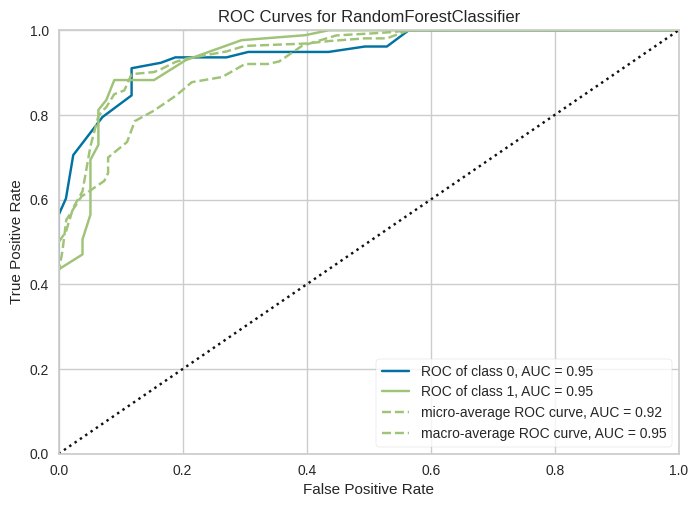

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [88]:
(unique, counts) = np.unique(RF_prediction_upsampled, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_upsampled, RF_prediction_upsampled)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Liver disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Liver disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with liver disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after upsampling: ", roc_auc_score(y_test_upsampled, RF_prediction_upsampled))
print()

roc_auc=ROCAUC(model_RF_upsampled)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

#ENSEMBLE METHODS

In [92]:
# AVERAGING METHOD
from sklearn.metrics import mean_squared_error

pred1 = LR_prediction_upsampling
pred2 = SVM_prediction_upsampling
pred3 = RF_prediction_upsampled

pred_final = (pred1+pred2+pred3)/3.0

# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test_upsampled, pred_final))

0.24471710974778457


In [93]:
# MAX VOTING
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

model_1 = model_LR
model_2 = model_SVM
model_3 = model_RF

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('logr', model_1), ('svm', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train_upsampled, y_train_upsampled)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test_upsampled)

# printing log loss between actual and predicted value
print(log_loss(y_test_upsampled, pred_final))

12.604222350795569


In [94]:
# VOTING ENSEMBLE
from sklearn import model_selection
seed = 42
kfold = model_selection.KFold(n_splits=20)

estimators = [] # create different models

model_1 = LogisticRegression(); estimators.append(('logistic',model_1))
model_2 = SVC(); estimators.append(('svm',model_2))
model_3 = RandomForestClassifier(); estimators.append(('rf',model_3))

from sklearn.ensemble import VotingClassifier # create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train_upsampled, y_train_upsampled, cv=kfold)
print(results.mean())

0.6526515151515151


 # k-folds validation on Random Forest model(After SMOTEENN)

In [111]:
from sklearn.model_selection import cross_val_score
#In general, the more folds we use in k-fold cross-validation the lower the bias of the test MSE
#but the higher the variance. Conversely, the fewer folds we use the higher the bias but the lower the variance

scores = cross_val_score(model_RF, X_resampled, y_resampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_RF, X_resampled, y_resampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [0.66363636 0.55151515 0.66363636 0.88787879 0.32727273 0.43939394
 0.55952381 0.55952381 0.44940476 0.88571429]

MEAN: 0.5987499999999999

Predicted_Cross_Val_Scores: 
 [0.91891892 0.89189189 0.91891892 0.97297297 0.83783784 0.86486486
 0.89189189 0.89189189 0.86486486 0.97222222]

MEAN: 0.9026276276276276


KFold on Logestic Regression model

In [101]:
scores = cross_val_score(model_LR, X_resampled, y_resampled, scoring='r2', cv=10)
#print(scores)
#print(np.mean(scores))

pred = cross_val_predict(model_LR, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_LR, X_resampled, y_resampled, cv=10)
#print(scores_test)

print(np.mean(scores_test))

0.7373123123123123


KFold on SVM model

In [102]:
scores = cross_val_score(model_SVM, X_resampled, y_resampled, scoring='r2', cv=10)
#print(scores)
#print(np.mean(scores))

pred = cross_val_predict(model_SVM, X_resampled, y_resampled)
#print(pred)

scores_test = cross_val_score(model_SVM, X_resampled, y_resampled, cv=10)
#print(scores_test)

print(np.mean(scores_test))

0.732057057057057


 # k-folds validation on Random Forest model(after Upsampling)

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_RF, X_upsampled, Y_upsampled, scoring='r2', cv=10) # 10 folds
print("Cross_Val_Scores: \n",scores)
print()

print("MEAN:",np.mean(scores))
print()

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF, X_upsampled, Y_upsampled)
#print(pred)

scores_test = cross_val_score(model_RF, X_upsampled, Y_upsampled, cv=10)
print("Predicted_Cross_Val_Scores: \n",scores_test)
print()

print("MEAN:",np.mean(scores_test))

Cross_Val_Scores: 
 [0.41463415 0.31707317 0.65426829 0.30853659 0.11097561 0.30853659
 0.06158537 0.06158537 0.65426829 0.65426829]

MEAN: 0.3545731707317074

Predicted_Cross_Val_Scores: 
 [0.85365854 0.82926829 0.91358025 0.82716049 0.77777778 0.82716049
 0.7654321  0.7654321  0.91358025 0.91358025]

MEAN: 0.8386630532971996
